In [14]:
# if using google colab, run this first:
!gdown --fuzzy "https://drive.google.com/file/d/1rYFumAaLcacQb59IYC-g_8douKWOIkTi/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1rYFumAaLcacQb59IYC-g_8douKWOIkTi
To: /content/IBM.csv
100% 978k/978k [00:00<00:00, 102MB/s]


In [15]:
# Objective
# * Predict customers likely to stop using telecom services to target retention efforts.

# Data
# * Customer usage, billing, complaint records, demographic info.

# Procedure Used
# * Data Balancing (SMOTE for imbalanced data)
# * Classification Algorithms (Logistic Regression, XGBoost)
# * Feature Importance Analysis

# Outcome
# * Proactive retention campaign to reduce churn rate.

#### LIBRARIES ####
  # Requirements natin dito is yung data analysis starter:
    # Numpy for extensive math
    # Pandas pang data manipulation
    # Matplotlib / Seaborn for visualization
    # scikit-learn for statistical computation
  # Gagamit din tayo ng SMOTE for handling imabalance dataset

"""
  We're trying to identify patterns of certain characteristics
  bakit ang isang customer ay nag-Churn o nag-end ng service.
  Pepredict din namin how likely sa mga hindi pa nagcchurn
  will they eventually churn. Gagamit tayo ng
  classification algorithims. As per instructions:
  Logistic Regression at XGBoost.
"""
  # Logistic Regression is simple, interpretable, but may underfit.
  # XGBoost is more powerful for complex relationships, handles imbalanced data well.

#### DATASET ####
  # Nakuha natin yung dataset from Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download
  # Originally named as: Telco Customer Churn
  # IBM Sample dataset to.
  # Of course, need neto maimport sa notebook:
    # Google Colab: run mo to sa pinakataas -> !gdown --fuzzy "https://drive.google.com/file/d/1rYFumAaLcacQb59IYC-g_8douKWOIkTi/view?usp=sharing"
      # Dapat nakapublic yung dataset para madownload. Nakalocate yung downloaded csv sa files/sample_data ng Colab
    # Locally, isama lang natin yung csv along with the notebook file sa iisang location.
  # Rule of thumb diyan is always check for contents ng csv externally or internally para magkaron naman ng familiarity at context.

#### DATA CLEANING ####
"""
  Next na titignan natin, kung tama ba yung datatype ng column.
  If a column should be string like 'Name', it should return as string type
  If float like "Revenue", it should return as float.
"""
  # Upon running dataframe information, we noticed that 'TotalCharges' is a string type.
  # Upon running total dataframe null values, 'TotalCharges' has 0 null values.
    # meaning, out of 7000 rows, lahat ay filled. Which is wala namang mali when you think about it.
  # Rule of thumb diyan, is we always work with missing values first.
  # " " (blank string) can be classified as a data of value. Meaning, may value parin yan.
  # We cannot convert 'TotalCharges' to float kasi (" ") blank strings are strings.
  # So need natin iconvert muna mga blank strings to NaN (Not-a-Number) para maidentify na null value sila
  # Then we can convert 'TotalCharges' datatype to float.
  # Recheck natin: running total dataframe null values, finally gave us 'TotalCharges' has 11 null values.
    # Ito rule diyan:
      # Kapag less ang missing rows sa overall row: Safe to drop (or delete kumbaga)
        # Since 11 lang naman total missing row ni 'TotalCharges', drop na natin
      # 5 - 10% ng rows ay missing: Fill with mean, median, or mode para ma-average
      # Kapag sobrang daming rows ang missing: Drop narin natin. Filling will introduce bias.
  # Temporarily magddrop din tayo ng column fields para sa testing at training, hindi mahihirapang basahin yung machine
    # Sa case nito: since customerID is unique identifier, di siya makakaapekto sa pag classify ng patterns. So drop it.
  # Working with redundant data na pwede namang globally i-rename as global value makakatulong sa pag train ng model
    # Sa case nito: May "No phone service" at "No internet service" Pwede namang gawing "No" nalang.
    # same goes with ensuring type casing din.

#### TRAIN TEST SPLIT + HANDLE CLASS IMBALANCE ####
  # ...

#### CUSTOM THRESHOLD PREDICTION ####
  # ...

#### FEATURE SCALING ####
  # ...

#### MODELLING ####
  # ...

#### EVALUATION ####
  # ...

#### PREDICTION AND OUTPUT ####
  # Palatino's Findings and Understandings:

  # In predicting churn customers for telecommunication services, both XGBoost and Logistic Regression were used to improve prediction accuracy. Each model has its own
  # strengths and weaknesses: XGBoost is great for identifying real churners and Logistic Regression is good for predicting loyal customers or moderate-risk cases.

  # However, both models can still make mistakes, particularly when using a high decision threshold (0.7). This high threshold makes the models more conservative, especially
  # XGBoost, causing it to miss customers with moderate churn risk.

  # A sample of ten customers was highlighted (6861-XWTWQ, 2609-IAICY, 6857-VWJDT, 3716-BDVDB, 1820-TQVEV, 8375-DKEBR, 5539-TMZLF, 1143-NMNQJ, 0841-NULXI, 8622-ZLFKO), these
  # customers have a high probability of leaving or stop using the telecommunication services based on XGBoost. While only 10 are shown for readability, the analysis will
  # extend its subset of at-risk customers. (By changing it through code (head))

  # During model evaluation, it was found that XGBoost failed to predict over 200 actual churners. Logistic Regression on the other hand, assigned moderate churn probabilities,
  # mostly ranging between 0.4 and 0.7 to many of these missed cases,  indicating that XGBoost may underestimate moderate-risk churners. A sample of ten customers was
  # highlighted (2839-RFSQE, 7752-XUSCI, 2091-MJTFX, 8676-TRMJS, 6298-QDFNH, 4800-CZMPC, 9286-DOJGF, 6646-QVXLR, 5049-GLYVG, 8988-ECPJR), these customers will actually
  # churn but the model missed it. This indicates that Logistic Regression can serve as a valuable secondary signal in identifying risky customers.

  # Adjusting the decision threshold or combining both model outputs could reduce false negatives and improve overall performance. These findings are crucial in defining
  # the scope of our proactive retention campaign, ensuring that more potential churners are identified and more customers will stay and keep using the telecommunication
  # services.


'\n  Next na titignan natin, kung tama ba yung datatype ng column.\n  If a column should be string like \'Name\', it should return as string type\n  If float like "Revenue", it should return as float.\n'

In [16]:
#### LIBRARIES ####
import pandas as pd
import numpy as np

# For splitting and scaling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# For modeling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, precision_score, precision_recall_curve
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, precision_score,
    precision_recall_curve
)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# For high-performance models
import xgboost as xgb

In [17]:
#### DATASET ####
# Load CSV
file_path = "IBM.csv"
df = pd.read_csv(file_path)
print(f"TELCO CUSTOMER CHURN: IBM SAMPLE DATASET\n{df.head()}") # check column contents
print("-"*60,"\n")

TELCO CUSTOMER CHURN: IBM SAMPLE DATASET
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streami

In [18]:
#### DATA CLEANING ####
# check for column datatypes
print("CHECK FOR COLUMN DATATYPES:")
df.info()
print("""\n
'TotalCharges' data type is string, which is weird.
Blank strings might be the reason why it cannot be converted to float.""")
print("-"*60,"\n")

# work with missing values first because blank 'strings' cannot be converted to float
print(f"CHECK FOR DATAFRAME TOTAL NULL VALUES:\n{df.isnull().sum()}")
print("\nNOTE: Blank strings can be classified as not null.")
print("-"*60,"\n")

# replace blank strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
print("Blank strings in 'TotalCharges' are replaced with NaN\n")
print(f"CHECK FOR DATAFRAME TOTAL NULL VALUES:\n{df.isnull().sum()}")
print("Missing TotalCharges: 11 (less missing data are safe to drop)")
print("-"*60,"\n")

# convert TotalCharges to float
df['TotalCharges'] = df['TotalCharges'].astype(float)
print("'TotalCharges' datatype is converted to float\n")
print(f"CHECK FOR COLUMN DATATYPES:")
df.info()
print("-"*60,"\n")

# Missing TotalCharges: 11 (less missing data are safe to drop, BRAD)
df = df.dropna() # drop rows with missing (NaN) values: TotalCharges
print(f"CHECK FOR DATAFRAME TOTAL NULL VALUES:\n{df.isnull().sum()}") # check missing
print("\n No Null values found")
print("-"*60,"\n")

# We'll temprorarily drop irrelevant columns for the model. This will reduce training load for the model to handle.
# customerID is purely unique identifier. It's safe to drop.
# As you can see, customerID is stored in "customer_id_copy". Gumawa ako ng copy niya para ma use as unique identifier sa results.
# Still, d-drop pa rin siya kasi kapag hindi dinrop, masasama siya sa training ng model, which may affect the performance of the model.
# Yung copy na yan will serve as unique identifier sa result para ma identify kung sinong customer yon. Kasi lahat ng data na ginamit sa training, hindi na kasama sa testing.
customer_id_copy = df['customerID']
df = df.drop('customerID', axis = 1) # axis = 0: delete a row; axis = 1 delete a column
print("'customerID' dropped")
print("-"*60,"\n")

# work with redundant data. I'll just use AI to check for that shit with 7000 rows motherfucker that's a lot to analyze.
# According to my boy, BaiGPT. Mahimo natong i-standardize ang 'No phone service' ug 'No internet service' isip 'No' hinuon.
# Let's just use "No" for 'No internet service' and 'No phone service'.
df = df.replace({
    'MultipleLines': {'No phone service':'No'},
    'OnlineSecurity': {'No internet service':'No'},
    'OnlineBackup': {'No internet service':'No'},
    'DeviceProtection': {'No internet service':'No'},
    'TechSupport': {'No internet service':'No'},
    'StreamingTV': {'No internet service':'No'},
    'StreamingMovies': {'No internet service':'No'},

    # tinatamad na ako mag-ingles perd. May mga areas na okay naman like 'Bank transfer (automatic)' tsaka 'Credit card (automatic)'
    # pwede naman na tanggaling yung '(automatic)' part.
    # ganun din sa 'Contract' column. Yung casing lang like 'Month-To-Month' ganern!
    'PaymentMethod': {
        'Bank transfer (automatic)': 'Bank Transfer',
        'Credit card (automatic)': 'Credit Card'
    },
    'Contract': {
        'Month-to-month': 'Month-To-Month',
        'One year': 'One Year',
        'Two year': 'Two Year'
    }
})
print("""Redundancy reworked:
'MultipleLines': 'No phone service' is set to 'No'
'OnlineSecurity': 'No internet service' is set to 'No'
'OnlineBackup': 'No internet service' is set to 'No'
'DeviceProtection': 'No internet service' is set to 'No'
'TechSupport': 'No internet service' is set to 'No'
'StreamingTV': 'No internet service' is set to 'No'
'StreamingMovies': 'No internet service' is set to 'No'
'PaymentMethod': 'Bank transfer (automatic)' is set to 'Bank Transfer'
'Credit card (automatic)' is set to 'Credit Card'
'Contract': 'Month-to-month' is set to 'Month-To-Month',
'Contract': 'One year' is set to 'One Year',
'Contract': 'Two year' is set to 'Two Year'
""")
print("-"*60,"\n")

CHECK FOR COLUMN DATATYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

In [19]:
#### TRAIN TEST SPLIT + HANDLE CLASS IMBALANCE ####
# Map (not replace) numeric of 'Churn' instead of Yes or No, we'll do 1 or 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df_encoded = pd.get_dummies(df) # Turn categorical data to numeric
print("-"*60,"\n")

# Define the features (X) and labels (y).
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# Use train_test_split() to divide into training and test sets.
  # X_train: Features for training
  # X_test: Features for testing
  # y_train: Labels for training
  # y_test: Labels for testing
  # test_size is how much data goes into test set (denoted by 0.2 = 20%)
  # random_state is the seed so results is reproducible. No seed = random
  # stratify=y ensures the class distribution in y is preserved in both the train and test sets.
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, customer_id_copy, test_size=0.2, random_state=42, stratify=y)
  # 80% of data goes to training.
  # 20% goes to testing.
  # The proportion of churned vs. non-churned customers is the same in both sets.
  # The split will always be the same every time you run it (because of random_state=42).

# Apply SMOTE only to X_train and y_train.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print value_counts() to confirm class balance.
print(f"Before SMOTE:\n {y_train.value_counts()}")
print("-"*60,"\n")
print(f"Afer SMOTE:\n {y_train_resampled.value_counts()}")
print("-"*60,"\n")

------------------------------------------------------------ 

Before SMOTE:
 Churn
0    4130
1    1495
Name: count, dtype: int64
------------------------------------------------------------ 

Afer SMOTE:
 Churn
0    4130
1    4130
Name: count, dtype: int64
------------------------------------------------------------ 



In [20]:
#### FEATURE SCALING ####
# StandardScaler ensures fair treatment of all features in the model. Some features might have large values, while others have small values — but a “small” value in one
# feature might be “large” relative to its own distribution.

# Apply StandardScaler() or similar only to features (X), not labels (y).
scaler = StandardScaler()

# Remember: fit on X_train, then transform both X_train and X_test.
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [21]:
#### MODELLING ####
# LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_resampled) # Fit the model using X_train and y_train

# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train_resampled) # Fit the model using X_train and y_train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [22]:
#### CUSTOM THRESHOLD PREDICTION ####
# Predict probabilities instead of 0/1 directly
y_probs_lr = lr.predict_proba(X_test_scaled)[:, 1]
y_probs_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Set a custom threshold to increase precision (default is 0.5)
threshold = 0.7
y_pred_lr = (y_probs_lr >= threshold).astype(int)
y_pred_xgb = (y_probs_xgb >= threshold).astype(int)

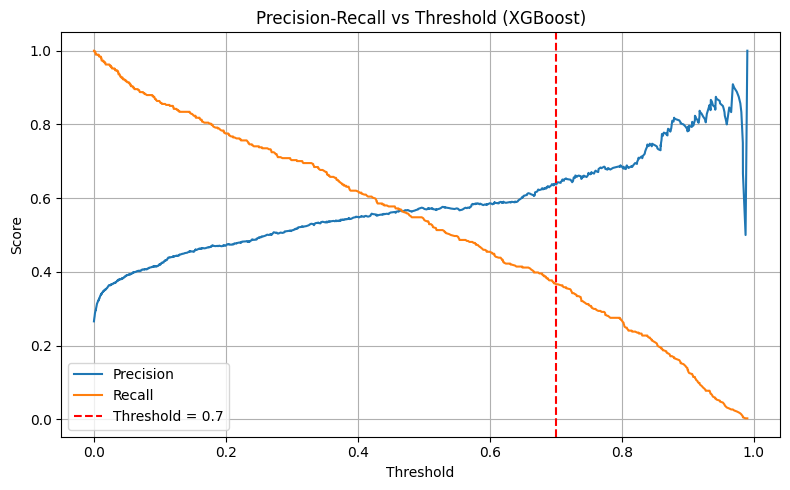

In [23]:
#### PRECISION-RECALL CURVE ####
precision, recall, thresholds = precision_recall_curve(y_test, y_probs_xgb)
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold (XGBoost)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Logistic Regression Accuracy:
 0.7732764747690121
------------------------------------------------------------ 

XGBoost Accuracy:
 0.7761194029850746
------------------------------------------------------------ 



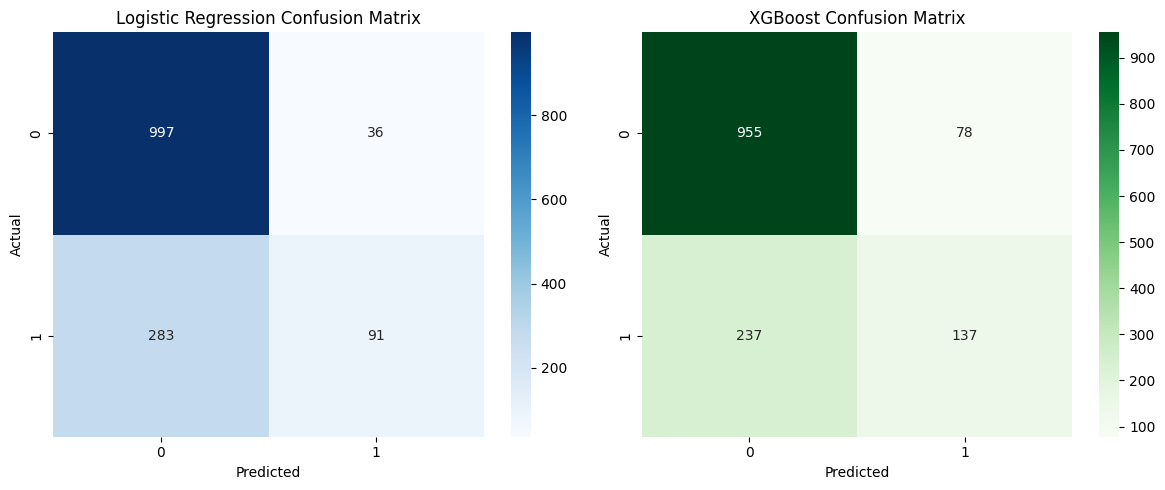

Logistic Regression Classification Report (threshold=0.7):
               precision    recall  f1-score   support

           0       0.78      0.97      0.86      1033
           1       0.72      0.24      0.36       374

    accuracy                           0.77      1407
   macro avg       0.75      0.60      0.61      1407
weighted avg       0.76      0.77      0.73      1407

------------------------------------------------------------ 

XGBoost Classification Report (threshold=0.7):
               precision    recall  f1-score   support

           0       0.80      0.92      0.86      1033
           1       0.64      0.37      0.47       374

    accuracy                           0.78      1407
   macro avg       0.72      0.65      0.66      1407
weighted avg       0.76      0.78      0.75      1407

------------------------------------------------------------ 



In [24]:
#### EVALUATION ####
# Accuracy
print(f"Logistic Regression Accuracy:\n {accuracy_score(y_test, y_pred_lr)}")
print("-"*60,"\n")

print(f"XGBoost Accuracy:\n {accuracy_score(y_test, y_pred_xgb)}")
print("-"*60,"\n")

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
# Akala ko wala ng kwenta ang buhay ko
# Pero sa 'yo ay nagkakulay 'to
# Pagdating sa 'yo tanggal dalawang sungay ko
# 'Yung dating matigas nagiging lantang gulay 'to


# Plot (visualization)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification report (precision, recall, F1-score)
print(f"Logistic Regression Classification Report (threshold={threshold}):\n {classification_report(y_test, y_pred_lr)}")
print("-"*60,"\n")
print(f"XGBoost Classification Report (threshold={threshold}):\n {classification_report(y_test, y_pred_xgb)}")
print("-"*60,"\n")

TOP 10 PREDICTIONS
   CustomerID  Actual  LogReg_Predicted  LogReg_Probability  XGB_Predicted  \
0  0604-THJFP       0                 0            0.014116              0   
1  4059-IIEBK       0                 0            0.616168              0   
2  2228-BZDEE       0                 0            0.005123              0   
3  2839-RFSQE       1                 0            0.296936              0   
4  5360-LJCNJ       0                 0            0.109429              0   
5  7752-XUSCI       1                 0            0.513419              0   
6  8277-RVRSV       0                 0            0.024770              0   
7  3530-CRZSB       0                 0            0.240843              0   
8  2845-HSJCY       1                 0            0.681514              1   
9  0336-KXKFK       0                 0            0.012032              0   

   XGB_Probability  
0         0.005628  
1         0.668626  
2         0.021080  
3         0.108084  
4         0.54658

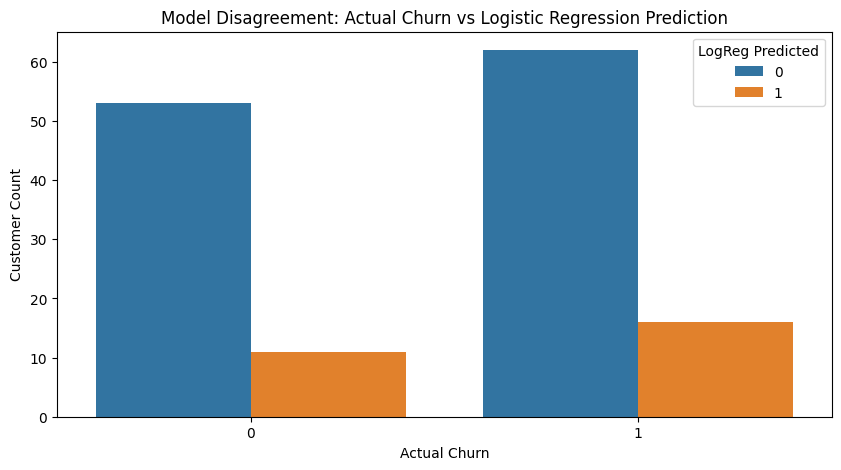

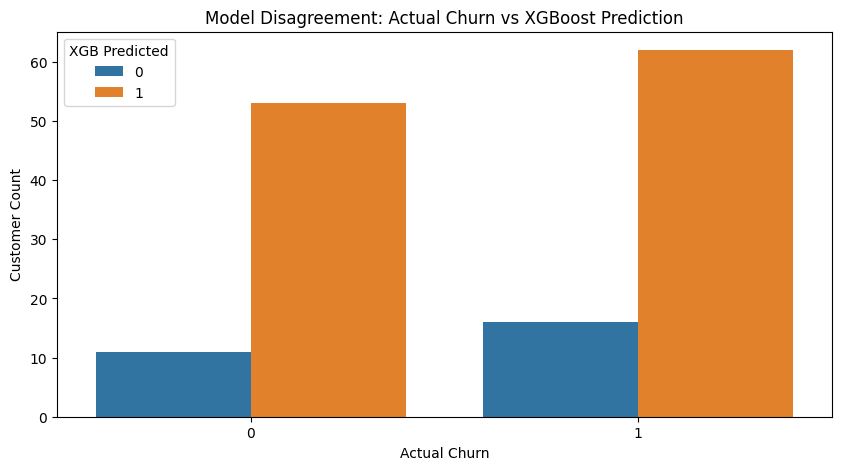

------------------------------------------------------------ 

Customers with high-confidence churn predictions (both models agree):
     CustomerID  Actual  LogReg_Predicted  LogReg_Probability  XGB_Predicted  \
591  6861-XWTWQ       1                 1            0.827168              1   
805  2609-IAICY       1                 1            0.793616              1   
667  6857-VWJDT       1                 1            0.748259              1   
31   3716-BDVDB       1                 1            0.755957              1   
304  1820-TQVEV       1                 1            0.754535              1   
369  8375-DKEBR       1                 1            0.781424              1   
397  5539-TMZLF       1                 1            0.776491              1   
439  1143-NMNQJ       1                 1            0.814610              1   
261  0841-NULXI       1                 1            0.757458              1   
402  8622-ZLFKO       0                 1            0.735962      

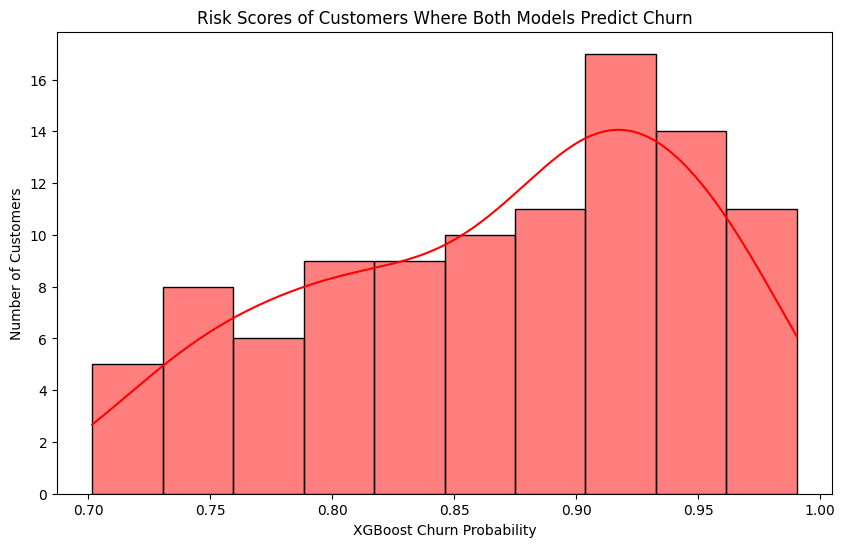

<ipython-input-25-84a31009e653>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="CustomerID", y='XGB_Probability', palette="Reds_r")


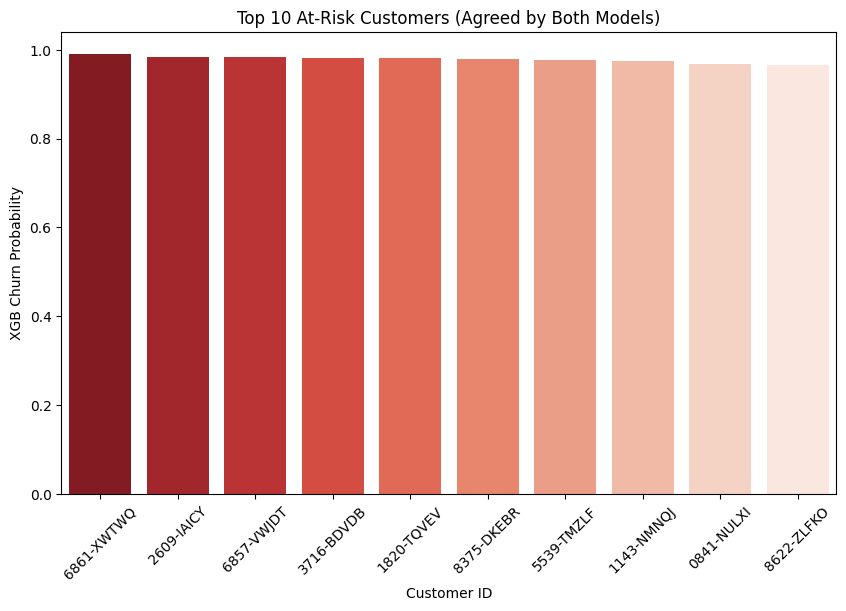

------------------------------------------------------------ 

False negatives (actual churn but model missed):
    CustomerID  Actual  LogReg_Predicted  LogReg_Probability  XGB_Predicted  \
3   2839-RFSQE       1                 0            0.296936              0   
5   7752-XUSCI       1                 0            0.513419              0   
14  2091-MJTFX       1                 0            0.171549              0   
16  8676-TRMJS       1                 0            0.657338              0   
17  6298-QDFNH       1                 0            0.595503              0   
23  4800-CZMPC       1                 0            0.153976              0   
25  9286-DOJGF       1                 0            0.412559              0   
29  6646-QVXLR       1                 0            0.309959              0   
38  5049-GLYVG       1                 0            0.304124              0   
73  8988-ECPJR       1                 0            0.371406              0   

    XGB_Probabilit

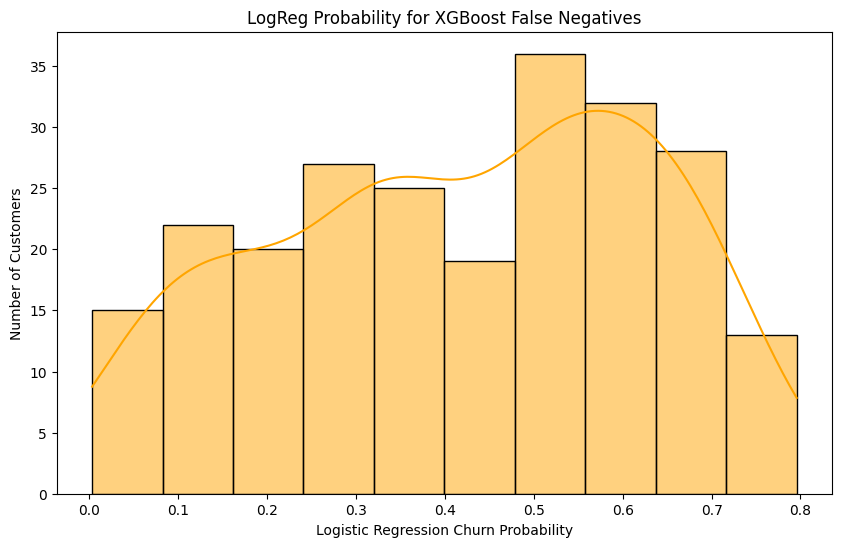

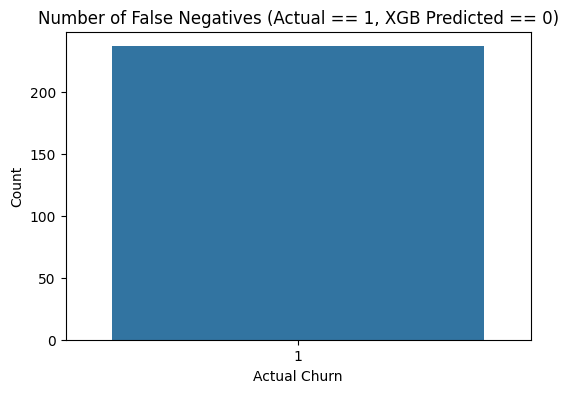

------------------------------------------------------------ 



'\nHindi ko alam paano "Proactively" magbibigay ng retention campaign sakanila\n  * Offer the likely churning customer a discount\n  * Assign a customer care agent\n  * send a feedback survey (too keep them satisfied?)\ndi ko lang alam pano ko ISUSUKSOK dito yan.\nGusto ba ni ma\'am interactive?\nKinangangamba ko lang, di naman din kasi alam ni ma\'am yan baka mas humirap trabaho NATIN\npucha tinanong nga natin siya diyan nilagay lang yung pangalan ni Enriquez sa doc\n'

In [25]:
#### PREDICTION AND OUTPUT ####
output = pd.DataFrame({
    'CustomerID': id_test.values,
    'Actual': y_test.values,
    'LogReg_Predicted': y_pred_lr,
    'LogReg_Probability': y_probs_lr,
    'XGB_Predicted': y_pred_xgb,
    'XGB_Probability': y_probs_xgb
})

print(f"TOP 10 PREDICTIONS\n{output.head(10)}") # Show top 10 predictions
print("-"*60, "\n")

# Save to CSV for further inspection
output.to_csv("churn_predictions_threshold_0.7.csv", index=False)
print("Predictions saved to churn_predictions_threshold_0.7.csv")
print("-"*60, "\n")

# Customers where the two models disagree
disagreement = output[output['LogReg_Predicted'] != output['XGB_Predicted']]
print("Customers with model disagreement:")
print(disagreement.head(10))

# Visualization
plt.figure(figsize=(10, 5))
sns.countplot(data=disagreement, x='Actual', hue='LogReg_Predicted')
plt.title("Model Disagreement: Actual Churn vs Logistic Regression Prediction")
plt.xlabel("Actual Churn")
plt.ylabel("Customer Count")
plt.legend(title="LogReg Predicted")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=disagreement, x='Actual', hue='XGB_Predicted')
plt.title("Model Disagreement: Actual Churn vs XGBoost Prediction")
plt.xlabel("Actual Churn")
plt.ylabel("Customer Count")
plt.legend(title="XGB Predicted")
plt.show()

print("-"*60, "\n")

# Customers where both models agree on churn (AT RISK OF CHURNING DITO NA PAPASOK YUNG PROACTIVE RETENTION CAMPAIGN SHIT)
agreed_churn = output[(output['LogReg_Predicted'] == 1) & (output['XGB_Predicted'] == 1)]
agreed_churn = agreed_churn.sort_values(by='XGB_Probability', ascending=False)
print("Customers with high-confidence churn predictions (both models agree):")
print(agreed_churn.head(10))

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(agreed_churn['XGB_Probability'], bins=10, kde=True, color='red')
plt.title("Risk Scores of Customers Where Both Models Predict Churn")
plt.xlabel("XGBoost Churn Probability")
plt.ylabel("Number of Customers")
plt.show()

top10 = agreed_churn.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x="CustomerID", y='XGB_Probability', palette="Reds_r")
plt.title("Top 10 At-Risk Customers (Agreed by Both Models)")
plt.ylabel("XGB Churn Probability")
plt.xlabel("Customer ID")
plt.xticks(rotation=45)
plt.show()

print("-"*60, "\n")

# OUTLIERS: Actual churners (Actual == 1) but predicted as not churn (0) (XGBoost)
false_negatives = output[(output['Actual'] == 1) & (output['XGB_Predicted'] == 0)]
print("False negatives (actual churn but model missed):")
print(false_negatives.head(10))

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(false_negatives['LogReg_Probability'], bins=10, kde=True, color='orange')
plt.title("LogReg Probability for XGBoost False Negatives")
plt.xlabel("Logistic Regression Churn Probability")
plt.ylabel("Number of Customers")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=false_negatives, x='Actual')
plt.title("Number of False Negatives (Actual == 1, XGB Predicted == 0)")
plt.xlabel("Actual Churn")
plt.ylabel("Count")
plt.show()
print("-"*60, "\n")

"""
Hindi ko alam paano "Proactively" magbibigay ng retention campaign sakanila
  * Offer the likely churning customer a discount
  * Assign a customer care agent
  * send a feedback survey (too keep them satisfied?)
di ko lang alam pano ko ISUSUKSOK dito yan.
Gusto ba ni ma'am interactive?
Kinangangamba ko lang, di naman din kasi alam ni ma'am yan baka mas humirap trabaho NATIN
pucha tinanong nga natin siya diyan nilagay lang yung pangalan ni Enriquez sa doc
"""

Common Categories in high-risk churners:

OnlineSecurity_No = 99.0% of high-risk customers are 'No'
Dependents_No = 94.0% of high-risk customers are 'No'
PhoneService_Yes = 93.0% of high-risk customers are 'Yes'
InternetService_Fiber optic = 93.0% of high-risk customers are 'Fiber optic'
OnlineBackup_No = 92.0% of high-risk customers are 'No'
PaperlessBilling_Yes = 88.0% of high-risk customers are 'Yes'
PaymentMethod_Electronic check = 87.0% of high-risk customers are 'Electronic check'
DeviceProtection_No = 77.0% of high-risk customers are 'No'
Partner_No = 76.0% of high-risk customers are 'No'


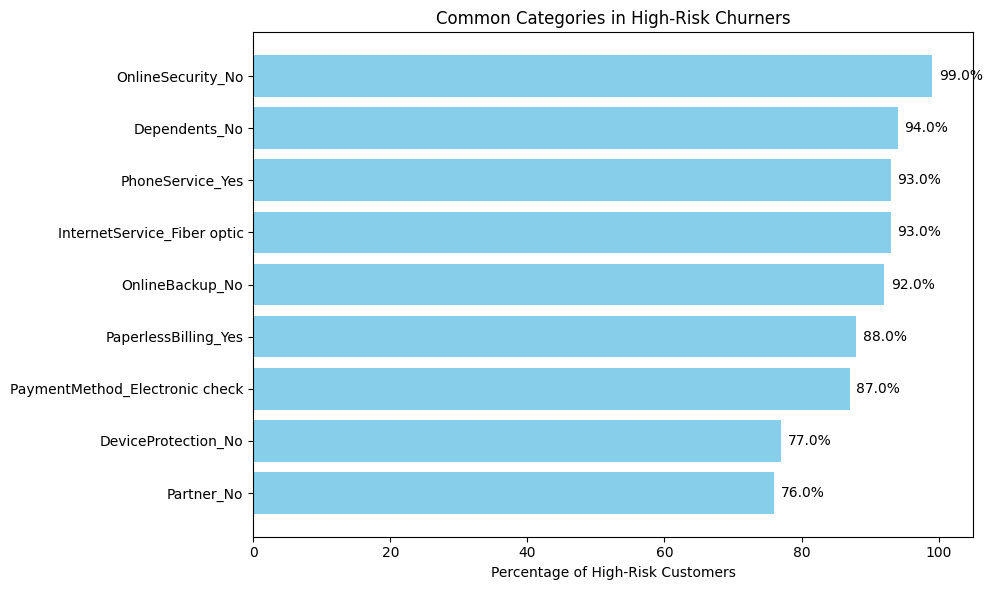

------------------------------------------------------------ 



In [26]:
#### COMMON CATEGORIES IN HIGH RISK CHURNERS ####

# print(X_test)

# Reset index to ensure they align
X_test_reset = X_test.reset_index(drop=True)
output_reset = output.reset_index(drop=True)

# Filter agreed high-risk customers
high_risk = output_reset[(output_reset['LogReg_Predicted'] == 1) &
                         (output_reset['XGB_Predicted'] == 1) &
                         (output_reset['XGB_Probability'] >= 0.70)]

# Get matching features from X_test
high_risk_features = X_test_reset.loc[high_risk.index]

# Analyze feature distributions
threshold = 0.70
print(f"Common Categories in high-risk churners:\n")

results = []

for col in high_risk_features.columns:
    if high_risk_features[col].dtype == 'object':
        top_val = high_risk_features[col].value_counts(normalize=True).idxmax()
        percent = high_risk_features[col].value_counts(normalize=True).max() * 100
        if percent >= 70:
            results.append((col, percent, f"{col} = {percent:.1f}% of high-risk customers have '{top_val}'"))

    elif high_risk_features[col].nunique() == 2 and set(high_risk_features[col].unique()) <= {0, 1}:
        mean_val = high_risk_features[col].mean() * 100
        if mean_val >= 70:
            category_name = col.split('_')[-1] if '_' in col else col
            results.append((col, mean_val, f"{col} = {mean_val:.1f}% of high-risk customers are '{category_name}'"))

# Sort results by the percentage (index 1) in descending order
results.sort(key=lambda x: x[1], reverse=True)

# Print sorted results
for _, _, message in results:
    print(message)

# Step 3: Plotting
labels = [x[0] for x in results]
values = [x[1] for x in results]

plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color='skyblue')
plt.xlabel("Percentage of High-Risk Customers")
plt.title("Common Categories in High-Risk Churners")
plt.xlim(0, 105)
plt.gca().invert_yaxis()

# Annotate bars
for bar, val in zip(bars, values):
    plt.text(val + 1, bar.get_y() + bar.get_height()/2, f"{val:.1f}%", va='center')

plt.tight_layout()
plt.show()

print("-"*60, "\n")